In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical

In [3]:
df = pd.read_csv('../data/wine_quality_modelos3.csv')
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_category_int,wine_type_int
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja,0,0
1,white,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja,0,1
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja,0,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,media,1,0
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,media,1,1
6493,red,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baja,0,0
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,media,1,1
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,media,1,1


In [13]:
X = df[['volatile acidity','total sulfur dioxide', 'density', 'pH','alcohol']]
y = df["quality_category_int"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(5197, 5)
(5197,)
(1300, 5)
(1300,)


In [14]:
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
capas = [
    keras.layers.Flatten(input_dim=5),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 64, activation='relu'),
    keras.layers.Dense(units = 3, activation='softmax')
]

model_neuronal = keras.models.Sequential(capas)

model_neuronal.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model_neuronal.summary()

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

history = model_neuronal.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 100,
    validation_split = 0.2
)

results = model_neuronal.evaluate(X_test, y_test)
results

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,259 (83.04 KB)

 Trainable params: 21,259 (83.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5452 - loss: 4.8268 - val_accuracy: 0.6260 - val_loss: 0.7854
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 0.8158 - val_accuracy: 0.6260 - val_loss: 0.7781
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 0.8011 - val_accuracy: 0.6260 - val_loss: 0.7824
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5863 - loss: 0.8090 - val_accuracy: 0.6260 - val_loss: 0.7754
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5805 - loss: 0.7998 - val_accuracy: 0.6260 - val_loss: 0.7714
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 0.7877 - val_accuracy: 0.6260 - val_loss: 0.7758
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5970 - loss: 0.7804 - val_accuracy: 0.6260 - val_loss: 0.7740
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.7842 - val_accu

[0.7472273111343384, 0.6030769348144531]

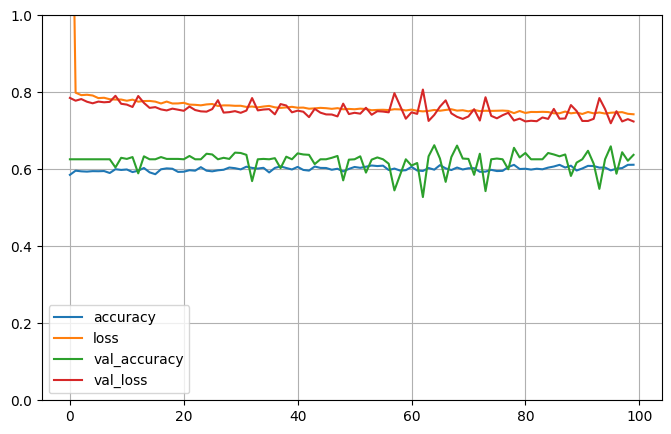

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
history_reentrenado = model_neuronal.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 100,
    validation_split = 0.2
)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6088 - loss: 0.7494 - val_accuracy: 0.6087 - val_loss: 0.7368
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5856 - loss: 0.7487 - val_accuracy: 0.6433 - val_loss: 0.7145
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6091 - loss: 0.7383 - val_accuracy: 0.6346 - val_loss: 0.7193
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6012 - loss: 0.7486 - val_accuracy: 0.6087 - val_loss: 0.7398
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5931 - loss: 0.7579 - val_accuracy: 0.6346 - val_loss: 0.7227
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6248 - loss: 0.7286 - val_accuracy: 0.6413 - val_loss: 0.7253
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6096 - loss: 0.7385 - val_accuracy: 0.6538 - val_loss: 0.7279
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.7427 - val_accu

In [18]:
results = model_neuronal.evaluate(X_test, y_test)
results

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 0.7100


[0.7155223488807678, 0.6630769371986389]

In [19]:
predictions = model_neuronal.predict(X_test)
predictions

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.23876424, 0.73909193, 0.02214381],
       [0.28002927, 0.6807458 , 0.03922489],
       [0.30759826, 0.664124  , 0.02827774],
       ...,
       [0.55766696, 0.4368654 , 0.00546772],
       [0.48733297, 0.5070096 , 0.00565739],
       [0.5748575 , 0.4155349 , 0.00960751]], dtype=float32)

In [23]:
y_pred_probs = model_neuronal.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
cm = confusion_matrix(y_test, model_neuronal.predict(X_test).argmax(axis=1))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [26]:
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_neuronal.classes if hasattr(model_neuronal, 'classes') else np.unique(y_test))

<Figure size 600x600 with 0 Axes>

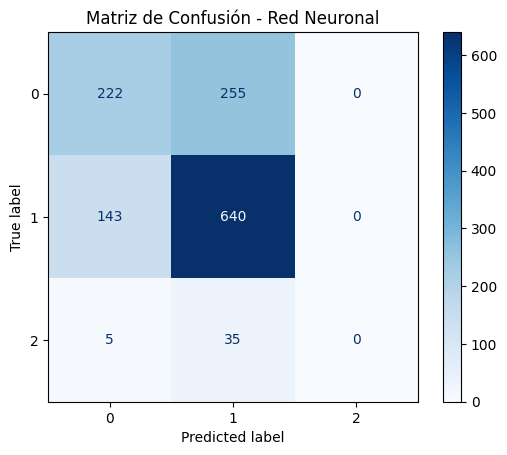

In [27]:
# Matriz de confusion
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión - Red Neuronal")
plt.grid(False)
plt.show()

In [10]:
print(classification_report(y_test, model_neuronal.predict(X_test).argmax(axis=1)))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       160
           1       0.99      0.96      0.97       490

    accuracy                           0.96       650
   macro avg       0.94      0.96      0.95       650
weighted avg       0.96      0.96      0.96       650

